<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matias Armijo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA/blob/main/assets/scipy-signal-convolution.png?raw=1"/></center>


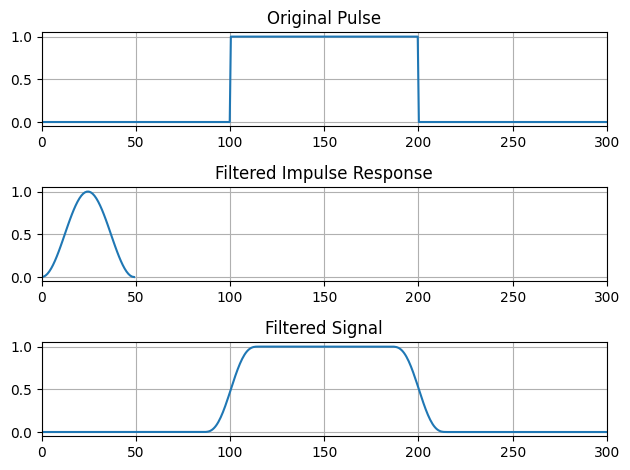

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy import signal


# Funcion para generar pulso original
def original_pulse(t,center,width):
    x = np.zeros_like(t)
    for a in range(len(t)):
        if t[a] >= center - width/2 and t[a] <= center + width/2:
            x[a] =  1     
    return x
    

T = 300    # Limite vector de tiempo
N = 500    # Cantidad de muestras del vector de tiempo

t = np.linspace(0, T, N)    # Tiempo para pulso original 
t2 = np.linspace(0,50,N)    # Tiempo para respuesta impulso filtrada

# Original pulse
pulse = original_pulse(t,150,100)

# Filter impulse response
h = signal.windows.hann(50)
signal_conv = convolve( pulse, h, mode = 'same') /sum(h)

# Tiempo para señal convolucionada
t3 = np.linspace(0,T,len(signal_conv))

# Graficos

# Pulso original
plt.subplot(3,1,1)
plt.plot(t,pulse)
plt.title('Original Pulse')
plt.grid(True)
plt.xlim(0,T)

# Respueta impulso filtrada
plt.subplot(3,1,2)
plt.plot(h)
plt.title('Filtered Impulse Response')
plt.grid(True)
plt.xlim(0,T)

# Señal filtrada
plt.subplot(3,1,3)
plt.plot(t3,signal_conv/np.max(signal_conv))
plt.title('Filtered Signal')
plt.grid(True)
plt.xlim(0,T)

plt.tight_layout()
plt.show()


## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


Valor medio señal con ruido =  0.06794698449511256


/home/matias/.local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/matias/.local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


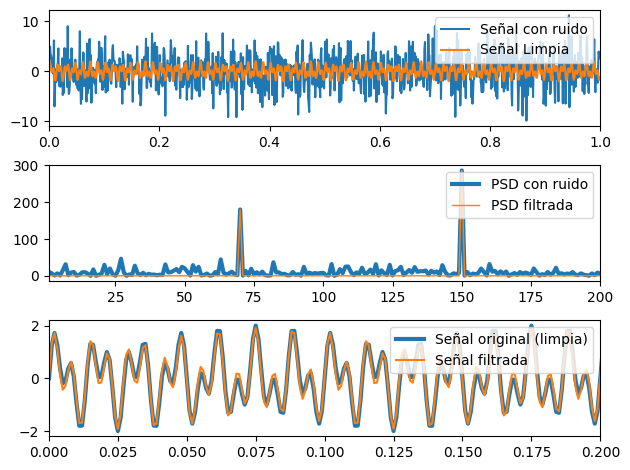

In [30]:
# Parametros vector de tiempo
ts = 0.001              # Periodo de muestreo
t = np.arange(0,1,ts)   # vector de tiempo
N = len(t)              # Tamaño vector de tiempo

# Señal Limpia
x1 = np.sin(2*np.pi*70*t) + np.sin(2*np.pi*150*t)

# Señal con ruido agregado
x1_noise_added = x1 + 3.1*np.random.randn(N)

# Valor medio señal con ruido
mean_value = np.mean(x1_noise_added)
print('Valor medio señal con ruido = ',mean_value)

# Aplicacion de fft y obtencion de la PSD
x1_hat = np.fft.fft(x1_noise_added,N)
PSD = x1_hat  * np.conj(x1_hat)/N
freq = 1/(ts*N)*np.arange(N)
L = np.arange(1,np.floor(N/2),dtype = 'int')


# Eliminacion de ruido 
# (frecuencias amplitud de PSD < 100[-] se eliminan)
PSD_filtered = PSD * (PSD > 100)
x1_hat_filtered = (PSD > 100) * x1_hat
x1_filt = np.fft.ifft(x1_hat_filtered)

# Graficos
fig, axs = plt.subplots(3,1)

# Señal limpia y señal con ruido agregado
plt.sca(axs[0])
plt.plot(t,x1_noise_added,label="Señal con ruido")
plt.plot(t,x1,label="Señal Limpia")
plt.xlim(0,1)
plt.legend(loc="upper right")

# PSD señal con ruido
plt.sca(axs[1])
plt.plot(freq[L], PSD[L],linewidth = 3,label = 'PSD con ruido')
plt.xlim(freq[L[0]],200)
plt.plot(freq[L],PSD_filtered[L], linewidth = 1,label = 'PSD filtrada')
plt.xlim(freq[L[0]],200)   
plt.legend(loc="upper right")

# Señal original y señal filtrada
plt.sca(axs[2])
plt.plot(t,x1,linewidth = 3,label='Señal original (limpia)')
plt.plot(t, x1_filt,label = 'Señal filtrada')
plt.xlim(0,0.2)    
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


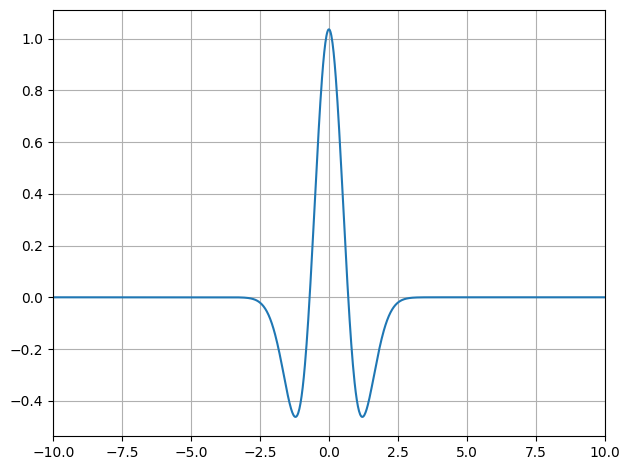

In [31]:
import numpy as np
import matplotlib.pyplot as plt


def mexican_hat(x, mu, sigma):

  a = 2/(np.sqrt(3*sigma)*pow(np.pi,1/4))
  return a*(1-pow(x,2)/pow(sigma,2))*np.exp(-pow(x,2)/(2*pow(sigma,2)))

# Vector de muestras
N = 1000
x1 = np.linspace(-10,10,N)

# Mexican Hat wavelet
sigma1 = 0.7
mu1 = 0
M = mexican_hat(x1,mu1,sigma1)

# Transformada wavelet
def wavelate_transform(a,b):
  return 0

# Graficos
plt.plot(x1,M)
plt.xlim(min(x1),max(x1))
plt.grid(True)


plt.tight_layout()
plt.show()


### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


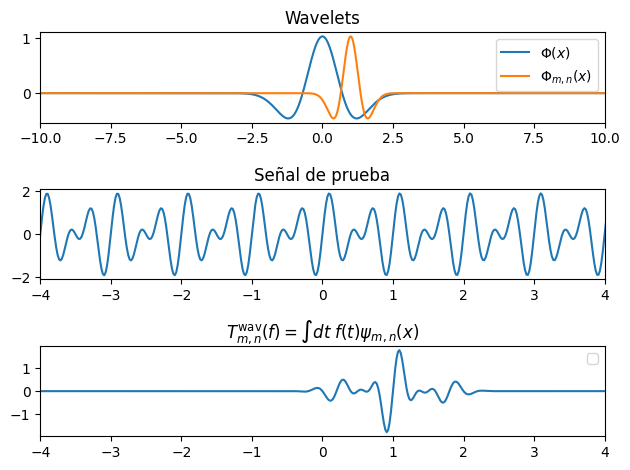

In [32]:
a0 = 2 
b0 = 1
m = -1
n = 2

# Señal de prueba
signal_1 = np.sin(2*np.pi*3*x1) + np.sin(2*np.pi*2*x1)

# Wavelet madre
phi_mn = mexican_hat(pow(a0,-m)*x1-n*b0,mu1,sigma1)

# inicializacion transformada
T_wav_f = np.zeros(N)

for a in range(N):
    T_wav_f[a] += signal_1[a] * phi_mn[a]

    
plt.subplot(3,1,1)
plt.title('Wavelets')
plt.plot(x1,M,label=r'$\Phi(x)$')
plt.plot(x1,phi_mn,label=r'$\Phi_{m,n}(x)$')
plt.xlim(-10,10)
plt.legend()

plt.subplot(3,1,2)
plt.title('Señal de prueba')
plt.plot(x1,signal_1)
plt.xlim(-4,4)

plt.subplot(3,1,3)
plt.title(r'$T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x)$')
plt.plot(x1,T_wav_f)
plt.legend()
plt.xlim(-4,4)

plt.tight_layout()
plt.show()




###  3.2.1. Explica el siguiente fragmento de código en detalle

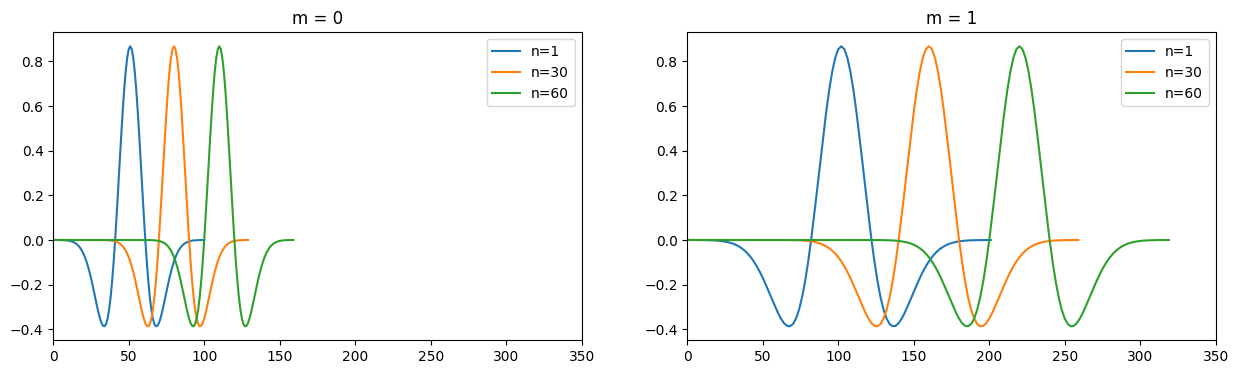

In [33]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

Explicacion: La funcion del codigo anterior es generar y visualizar wavelets escaladas y trasladadas utilizando la wavelet madre conocida como "mexican hat". se inicia  definiendo la función para la wavelet madre (en el segmento de codigo del punto 3.1) y luego establece parámetros para la representación, incluyendo rangos de escala y traslación. Luego, utiliza estas configuraciones para generar y representar diversas versiones escaladas y trasladadas de la wavelet madre en subgráficos separados. Esto proporciona una comprensión visual de cómo varía la forma de la wavelet madre en respuesta a diferentes escalas y traslaciones en el dominio del espacio.

Pasos del codigo:

1. definicion de la funcion **psi_mn**: esta funcion toma una wavelet madre (psi) y un factor de escala **m** y un factor de traslacion **n**, para luego calcular y retornar una version escalada y trasladada de la wavelet madre **psi**, segun los valores de entrada  de la funcion.

2. Construccion de la wavelet madre **psi**: Se define la wavelet madre utilizando la funcion **mexican_hat** en un rango de valores contenidos en el arreglo x de -5 a 5 con un paso de 0.1. Esto crea una wavelet madre con una media de 0 y una desviacion estandar de 1.

3. Configuracion de parametros para la representacion de la wavelets: se definen las escalas (**ns**) y las traslaciones (**ms**) que se usarán para generar y representar las diferentes versione escaladas y trasladadas de la wavelet madre.

4. Representacion de las wavelets escaladas y trasladadas:
se crea una figura con dos subgraficos, uno para cada valor de **m** en **ms**. Luego, para cada valor de **n** en **ns**, e calcula y representa la wavelet correspondiente utilizando la funcion **psi_mn**. Cada wavelet se representa en el subgrafico correspondiente, con una leyenda mostrando el valor de **n** respectivamente para cada representacion.

### 3.2.2 completa el siguiente código para realizar la transformada


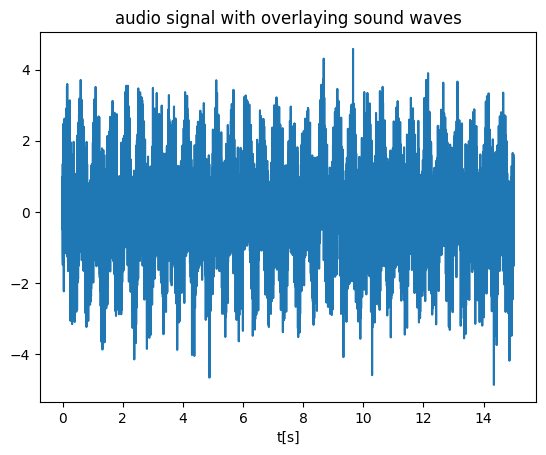

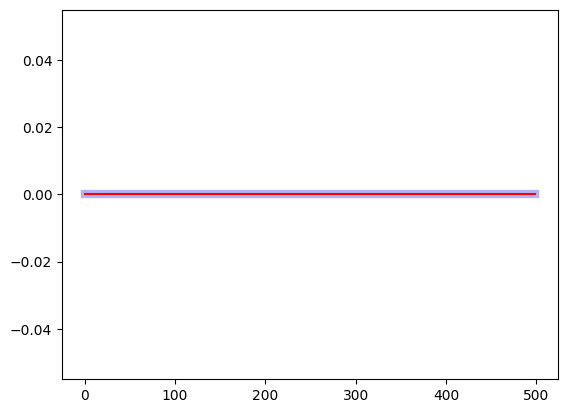

In [34]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    f_scaled = 0
    transform_scaled =  0
    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    pmn = 0
    transform = 0
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

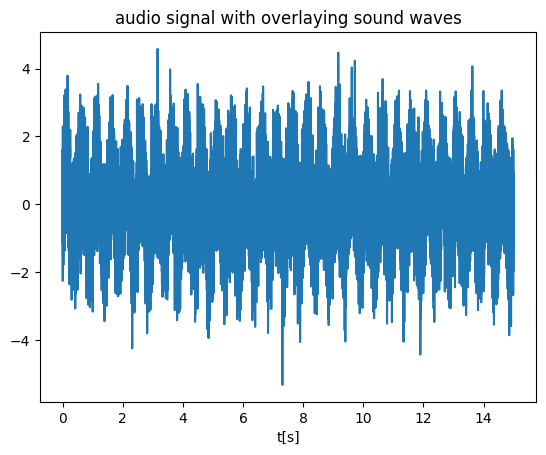

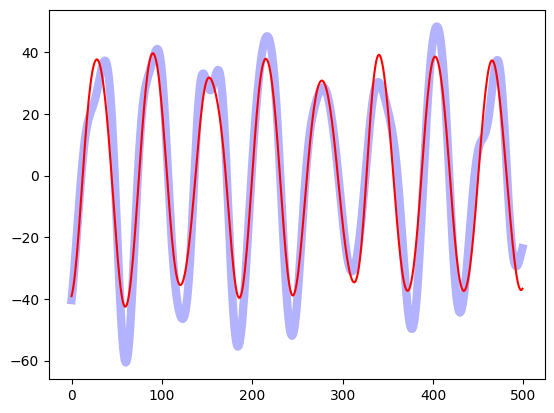

In [35]:
import numpy as np
import matplotlib.pyplot as plt

"""Wavelet Transform Function"""
def twav_mn(f, psi, m, n):
    f_scaled = f[::2**m]
    # we have 2 scaling factors: 2**(-m/2.0) from the formula and 2**m from our step length
    # => total scaling factor is 2**(-m/2.0) * 2**m = 2 ** (m - m/2.0) = 2**(m/2.0)
    transform_scaled = 2**(m/2.0) * np.sum(f_scaled[n:n+len(psi)] * psi)
    return transform_scaled

"""Naive Transform Function"""
def twav_mn_naive(f, psi, m, n):
    pmn = psi_mn(psi, m, n)
    transform = 2**(-m/2.0) * np.sum(f[:len(pmn)] * pmn)
    return transform

# Define parameters
m = 3
ns = np.arange(1000, 1500)
res = 1000
freq = 2

# Creating a wave to analyze
x = np.arange(0, 15000, 1)
noise = np.random.normal(0, 1, len(x))
audio = np.sin(np.arange(15000) * 2 * np.pi * freq / res) + noise

# Calculate the transformed signal using both methods
transformed_sweep_t = [twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweep_t = [twav_mn_naive(audio, psi, m, n) for n in ns]

# Plotting the signals
plt.plot(np.arange(len(audio), dtype="float32") / res, audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()

plt.plot(transformed_sweep_t, color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweep_t, "r-")
plt.show()


### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

In [44]:
import pandas as pd
import numpy as np
import scaleogram as scg

nino3 = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
nino3 = pd.read_table(nino3)

data = nino3.values.squeeze()
N = data.size; print("Nb of samples of data:", N)
t0 = 1871; dt = 0.25
year = t0 + np.arange(len(data))*dt

scales = np.logspace(1.2, 3.1, num=200, dtype=int)
#scales = np.arange(15,600, 4)
ax = scg.cws(year, data, scales, figsize=(12,6), ylabel="Period [Years]", xlabel='Year', yscale='log')
ticks = ax.set_yticks([2,4,8, 16,32])
ticks = ax.set_yticklabels([2,4,8, 16,32])

Nb of samples of data: 503


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/